# 딥러닝 실습 - Cardiovascular Disease Dataset

---


In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

!gdown --id 10y8ofUxjkI4uEeFGLv1c7tOJ1Z2_9Zhh --output dataset.csv
df = pd.read_csv('./dataset.csv',sep=";")

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=10y8ofUxjkI4uEeFGLv1c7tOJ1Z2_9Zhh
To: /content/dataset.csv
100% 2.94M/2.94M [00:00<00:00, 222MB/s]


In [3]:
df.shape

(70000, 13)

In [4]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


There are 3 types of input features:
*   Objective: factual information;
*   Examination: results of medical examination;
*   Subjective: information given by the patient.

Features:
*   Age | Objective Feature | age | int (days)
*   Height | Objective Feature | height | int (cm) |
*   Weight | Objective Feature | weight | float (kg) |
*   Gender | Objective Feature | gender | categorical code |
*   Systolic blood pressure | Examination Feature | ap_hi | int |
*   Diastolic blood pressure | Examination Feature | ap_lo | int |
*   Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
*   Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
*   Smoking | Subjective Feature | smoke | binary |
*   Alcohol intake | Subjective Feature | alco | binary |
*   Physical activity | Subjective Feature | active | binary |
*   Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

In [5]:
data = np.array(df)
np.random.shuffle(data)

# Feature 분리
x_data = data[:,1:-1]
y_data = data[:,-1]

# Train / Validation / Test 데이터셋 분리
vol_train, vol_val, vol_test = 0.8, 0.1, 0.1
idx_train = int(x_data.shape[0]*vol_train)
idx_val = idx_train + int(x_data.shape[0]*vol_val)

x_train = x_data[:idx_train]
x_val = x_data[idx_train:idx_val]
x_test = x_data[idx_val:]

y_train = y_data[:idx_train]
y_val = y_data[idx_train:idx_val]
y_test = y_data[idx_val:]

print('x_train :', x_train.shape, '\tx_val :', x_val.shape, '\tx_test :', x_test.shape)
print('y_train :', y_train.shape, '\ty_val :', y_val.shape, '\ty_test :', y_test.shape)

x_train : (56000, 11) 	x_val : (7000, 11) 	x_test : (7000, 11)
y_train : (56000,) 	y_val : (7000,) 	y_test : (7000,)


In [6]:
# 데이터 정규화
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean)/std
x_val = (x_val - mean)/std
x_test = (x_test - mean)/std

In [7]:
# 모델 구성
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=[x_train.shape[1]]))
model.add(Dropout(0.5))
model.add(Dense(48, activation='relu'))
model.add(Dense(48, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(48, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 48)                  │           3,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 48)                  │           2,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 48)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 48)                  │           2,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 12)                  │             588 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,193 (35.91 KB)

 Trainable params: 9,193 (35.91 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 모델 훈련
history = model.fit(x_train, y_train, validation_data=(x_val,y_val),epochs=50, batch_size=560)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.5290 - loss: 0.6929 - val_accuracy: 0.6434 - val_loss: 0.6454
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6178 - loss: 0.6534 - val_accuracy: 0.6516 - val_loss: 0.6305
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6346 - loss: 0.6433 - val_accuracy: 0.6529 - val_loss: 0.6266
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6408 - loss: 0.6396 - val_accuracy: 0.6557 - val_loss: 0.6229
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6506 - loss: 0.6311 - val_accuracy: 0.6591 - val_loss: 0.6213
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6509 - loss: 0.6284 - val_accuracy: 0.6646 - val_loss: 0.6176
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6577 - loss: 0.6252 - val_accuracy: 0.6676 - val_loss: 0.6132
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6609 - loss: 0.6222 - val_accuracy: 0

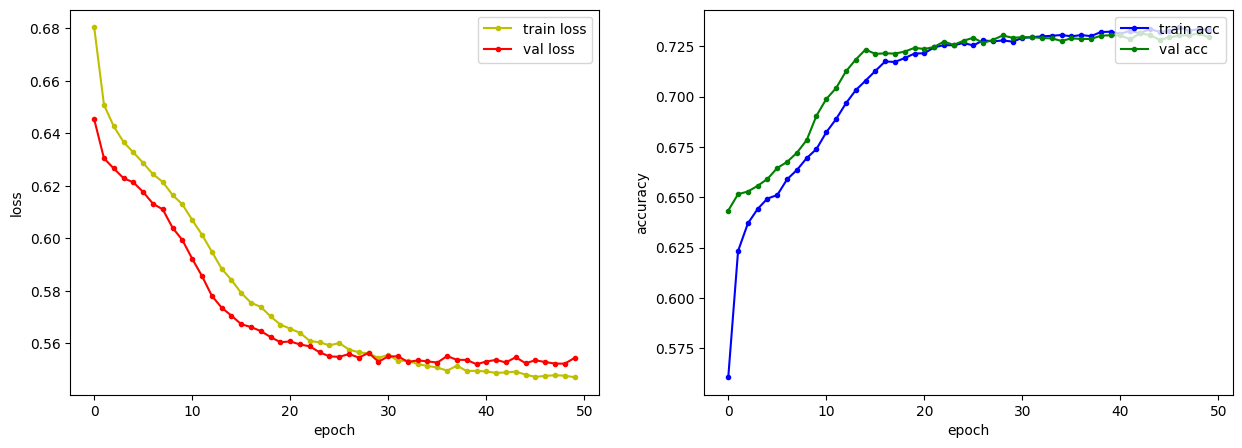

In [9]:
# 학습 확인
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(history.history['loss'], 'y.-', label='train loss')
ax[0].plot(history.history['val_loss'], 'r.-', label='val loss')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend(loc='upper right')

ax[1].plot(history.history['accuracy'], 'b.-', label='train acc')
ax[1].plot(history.history['val_accuracy'], 'g.-', label='val acc')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend(loc='upper right')

plt.show()

In [10]:
# test data를 이용한 평가
y_eval = model.evaluate(x_test, y_test)
print(y_eval)

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7321 - loss: 0.5453
[0.5451023578643799, 0.7358571290969849]


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


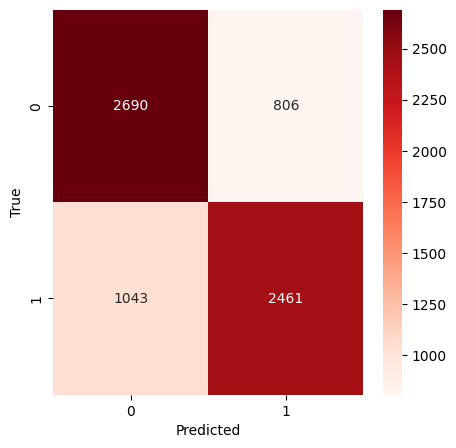

In [11]:
# 예측 결과 확인
y_hat = model.predict(x_test)

plt.figure(figsize = (5,5))
cm = confusion_matrix(y_test, np.round(y_hat))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Reds')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [12]:
# 오차 행렬 확인
print(classification_report(y_test, np.round(y_hat)))

              precision    recall  f1-score   support

         0.0       0.72      0.77      0.74      3496
         1.0       0.75      0.70      0.73      3504

    accuracy                           0.74      7000
   macro avg       0.74      0.74      0.74      7000
weighted avg       0.74      0.74      0.74      7000

